In [2]:
using Pkg
Pkg.activate("../")

using Base.Filesystem

# This is to read wav files.
# See: https://github.com/dancasimiro/WAV.jl
using WAV

using Plots
pyplot()

using Revise
using SpeechFeatures
using FFTW 
using PaddedViews

 Activating environment at `~/GithubRepositories/SpeechFeatures/Project.toml`


Download an example audio file from the TIMIT corpus.

In [2]:
if ! isfile("LDC93S1.wav")
    run(`wget https://catalog.ldc.upenn.edu/desc/addenda/LDC93S1.wav`)
end

Load the audio file

sampling freq: 16000.0 Hz
duration: 2.92 s


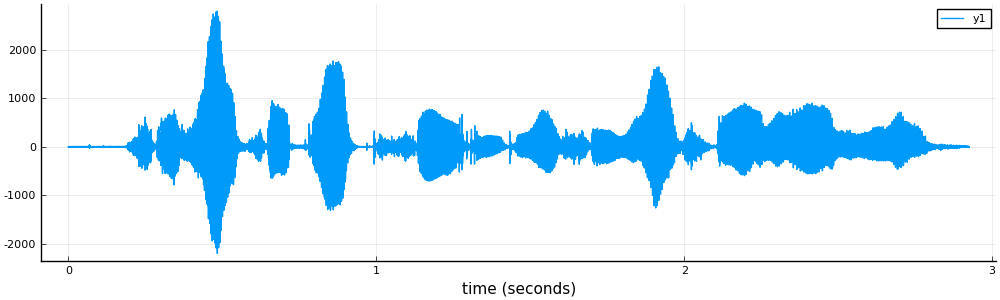

In [35]:
# The "native" option get the data in int16 type. 
# Reading the data in "double" format maybe cause 
# some problems later with the "dithering" parameter.
channels, srate = wavread("LDC93S1.wav", format="native")

# TIMIT data has only one channel (i.e. "mono") 
x = channels[:, 1]

println("sampling freq: $srate Hz\nduration: $(round(length(x) / srate, digits=2)) s")

t = range(0, length(x) / srate, length=length(x))
plot(t, x, size=(1000, 300), xlabel="time (seconds)")

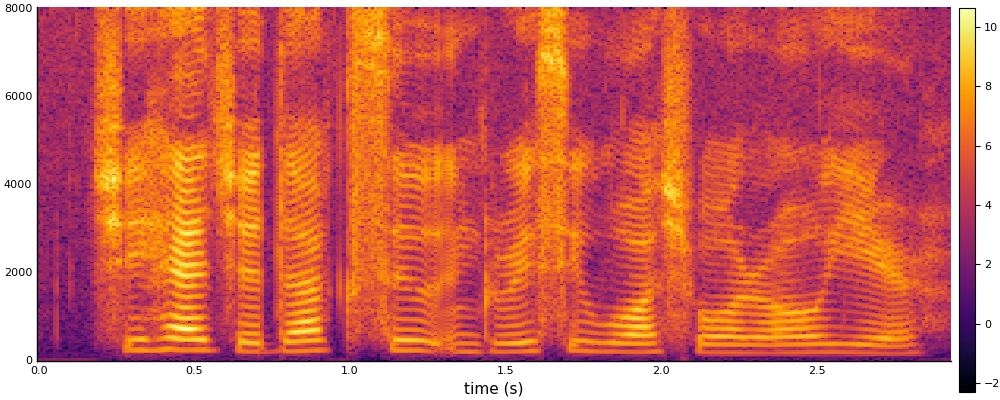

In [195]:
kaldiconf = Dict(
    :fftlen => fftlen_auto,
    :srate => 16000,
    :frameduration => 0.025,
    :framestep => 0.01,
    :removedc => true,
    :preemphasis => 0.97,
    :dithering => 1.,
    :windowfn => hann,
    :windowpower => 0.85,
)

S = stft(x; kaldiconf...)
magspectrogram = abs.(S)
heatmap(
    Vector(range(0, length(x) / srate, length=size(S, 2))),
    range(0, Int(srate / 2), length=size(S, 1)),
    log.(magspectrogram .+ nextfloat(0.)),
    size = (1000, 400),
    xlabel = "time (s)",
    clim = (log(0.1), Inf)
)

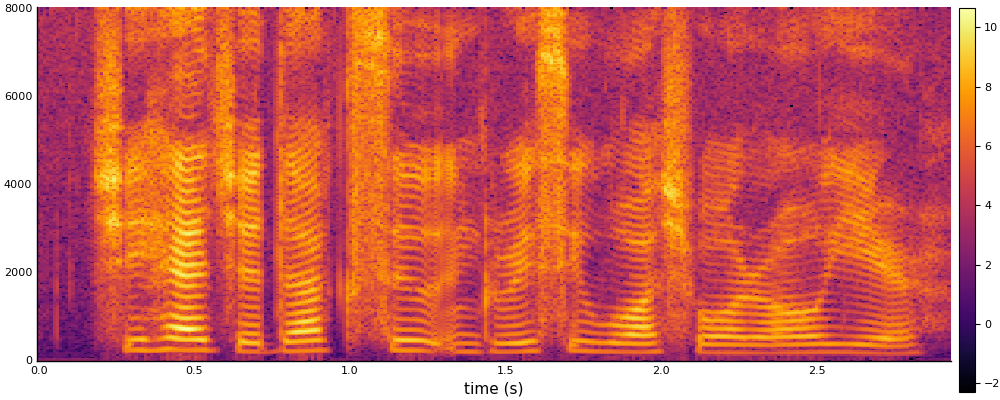

In [196]:
htkconf = Dict(
    :fftlen => fftlen_auto,
    :srate => 16000,
    :frameduration => 0.025,
    :framestep => 0.01,
    :removedc => true,
    :preemphasis => 0.97,
    :dithering => 0.,
    :windowfn => hamming,
    :windowpower => 1.,
)

S = stft(x; htkconf...)
magspectrogram = abs.(S)
heatmap(
    Vector(range(0, length(x) / srate, length=size(S, 2))),
    range(0, Int(srate / 2), length=size(S, 1)),
    log.(magspectrogram .+ nextfloat(0.)),
    size = (1000, 400),
    xlabel = "time (s)",
    clim = (log(0.1), Inf)
)

S = stft(x, dithering = 0., removedc = true, windowfn = hamming, preemphasis = 0.97)
magspectrogram = abs.(S)
heatmap(
    Vector(range(0, length(x) / srate, length=size(S, 2))),
    range(0, Int(srate / 2), length=size(S, 1)),
    log.(magspectrogram .+ nextfloat(0.)),
    size = (1000, 400),
    xlabel = "time (s)",
    clim = (log(0.1), Inf)
)